<a href="https://colab.research.google.com/github/Dhairyashil2002/MEME_CLASSIFICATION_USING_SENTIMENT_ANALYSIS/blob/main/eda_memes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dataset=pd.read_csv('label.csv')

In [ ]:
dataset.head(10)

,Unnamed: 0,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral
5,5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",hilarious,general,slight,motivational,negative
6,6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,not_funny,not_sarcastic,not_offensive,not_motivational,negative
7,7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,very_funny,twisted_meaning,not_offensive,not_motivational,neutral
8,8,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,funny,not_sarcastic,slight,motivational,positive
9,9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,funny,general,slight,motivational,positive


In [ ]:
print(dataset.shape)

(6992, 9)


In [ ]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(),4), '%mising values')

text_ocr 0.023 %mising values
text_corrected 0.0007 %mising values


In [ ]:
import seaborn as sns

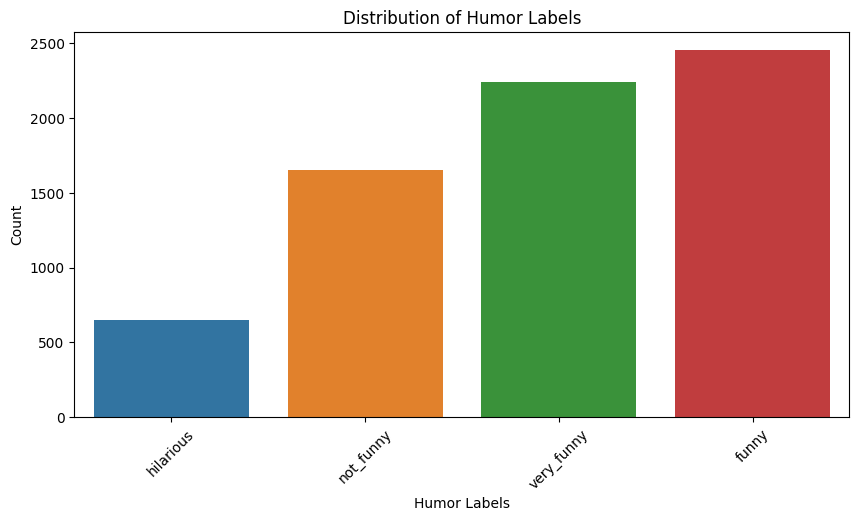

In [ ]:
# Bar plot for humor labels
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='humour')
plt.title('Distribution of Humor Labels')
plt.xlabel('Humor Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

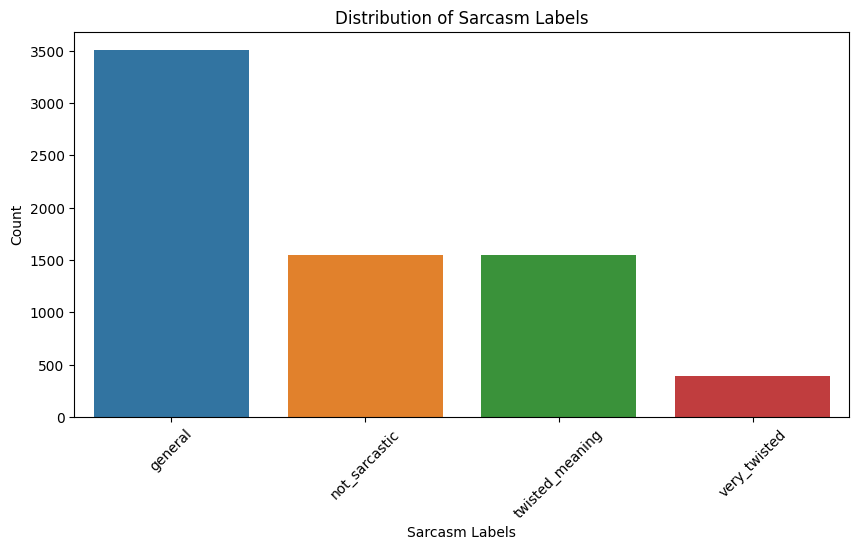

In [ ]:
# Bar plot for offensive labels
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='sarcasm')
plt.title('Distribution of Sarcasm Labels')
plt.xlabel('Sarcasm Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

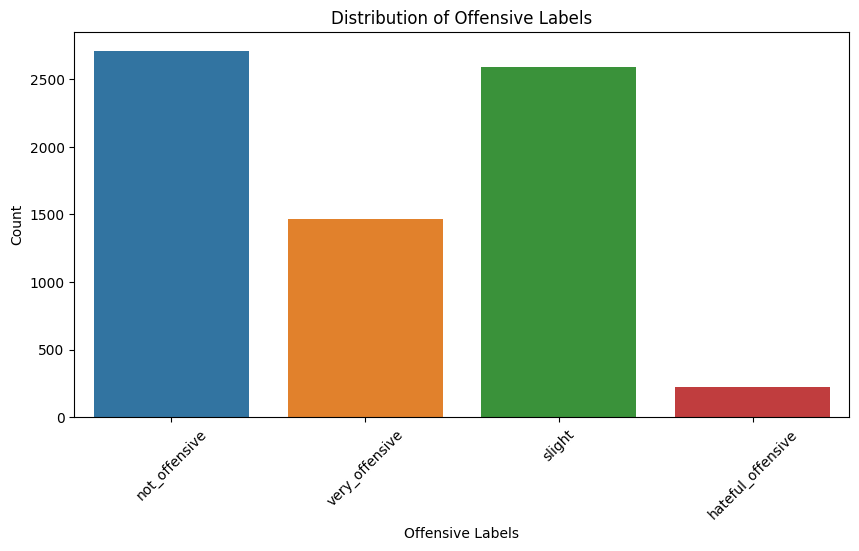

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='offensive')
plt.title('Distribution of Offensive Labels')
plt.xlabel('Offensive Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

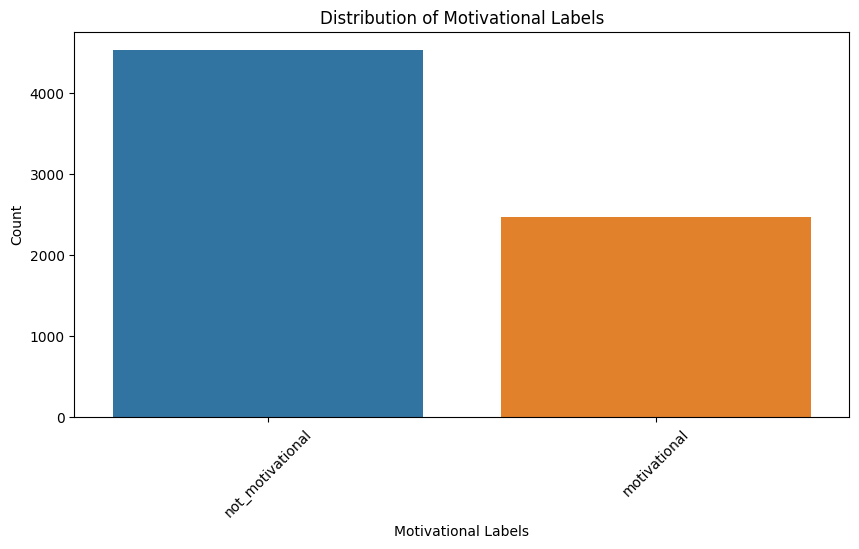

In [ ]:
# Bar plot for motivational labels
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='motivational')
plt.title('Distribution of Motivational Labels')
plt.xlabel('Motivational Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

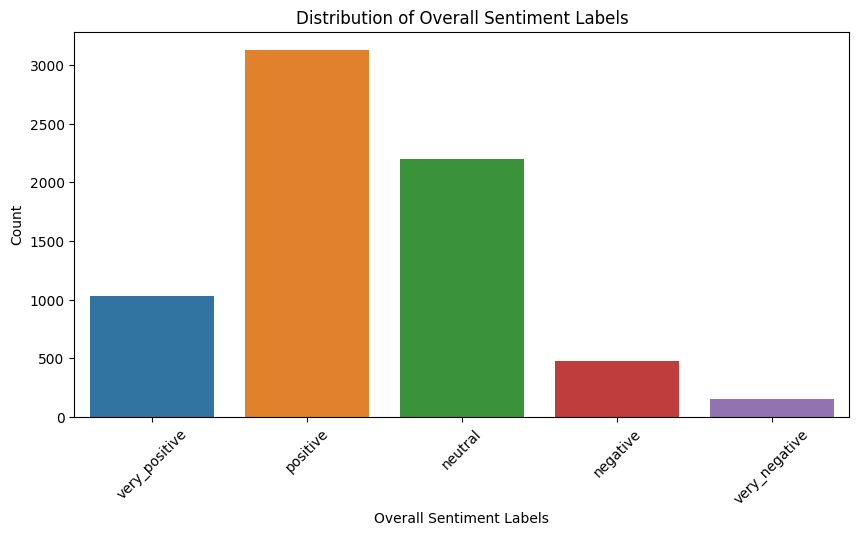

In [ ]:

# Bar plot for overall sentiment labels
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='overall_sentiment')
plt.title('Distribution of Overall Sentiment Labels')
plt.xlabel('Overall Sentiment Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

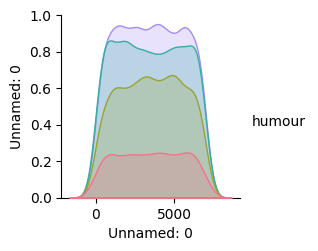

In [ ]:
#Pairplot for Multivariate Analysis:
sns.pairplot(dataset, hue='humour', markers=["o", "s", "D", "x"], palette='husl')
plt.show()

In [ ]:
pip install wordcloud


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 460.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_13_0_arm64.whl size=154670 sha256=c16521ec753a401208626970e67d66d39e17087600d9c59671682b31f546cddb
  Stored in directory: /Users/aryankumar/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from wordcloud import WordCloud

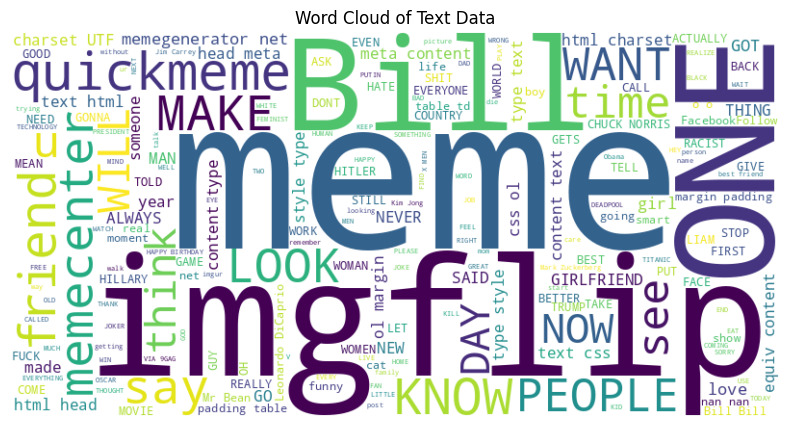

In [ ]:
# Ensure all values in 'text_ocr' column are strings
dataset['text_ocr'] = dataset['text_ocr'].astype(str)

# Now you can create the word cloud
text = ' '.join(dataset['text_ocr'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


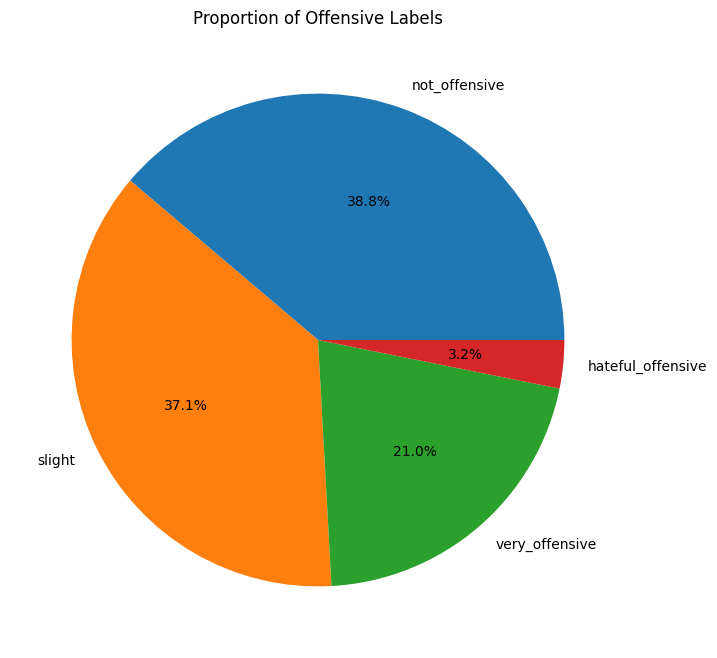

In [ ]:
plt.figure(figsize=(8, 8))
dataset['offensive'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Offensive Labels')
plt.ylabel('')
plt.show()


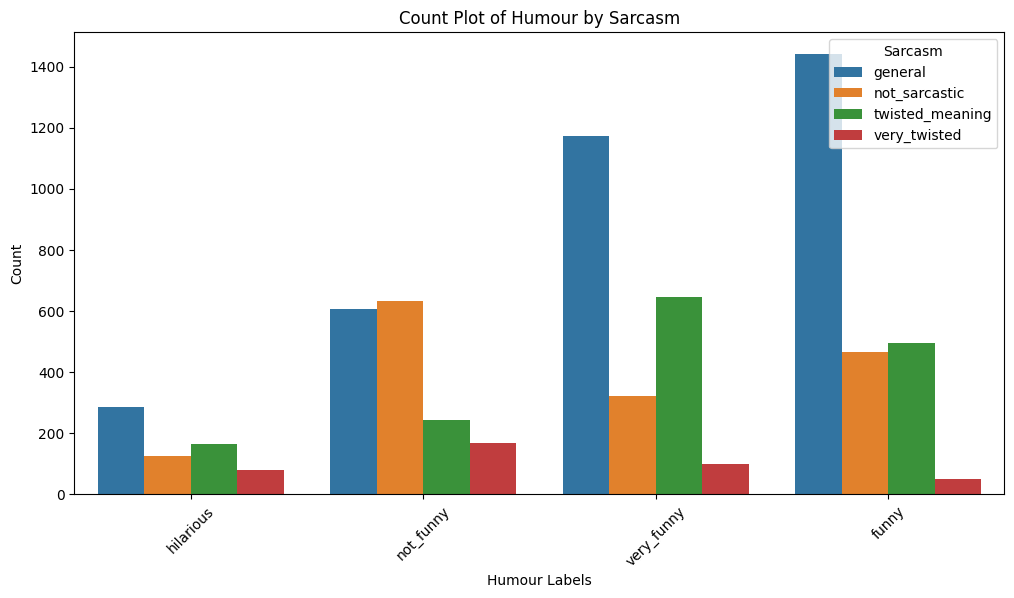

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='humour', hue='sarcasm')
plt.title('Count Plot of Humour by Sarcasm')
plt.xlabel('Humour Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sarcasm', loc='upper right')
plt.show()


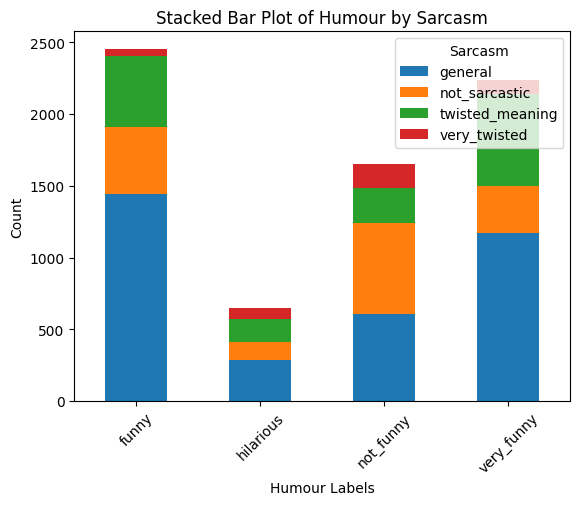

In [ ]:
pd.crosstab(dataset['humour'], dataset['sarcasm']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Humour by Sarcasm')
plt.xlabel('Humour Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sarcasm', loc='upper right')
plt.show()


In [ ]:
numerical_summary = dataset.describe()

In [ ]:

# Frequency counts for a non-numerical column
value_counts = dataset['offensive'].value_counts()

In [ ]:
print(unique_values_count)

4


In [ ]:
print(value_counts)

offensive
not_offensive        2713
slight               2592
very_offensive       1466
hateful_offensive     221
Name: count, dtype: int64
